# PROBLEM STATEMENT

## Predict the presence of heart disease in patients using clinical data. This practical exercise involves real-world binary classification.
- Logistic Regression
- Neural Networks
- Random Forest

## Dataset Description
dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease), which contains medical attributes such as age, cholesterol levels, blood pressure, and more.

The task is to predict whether a patient has heart disease (target = 1) or not (target = 0).

### Objectives
- Perform exploratory data analysis (EDA)
- Preprocess data effectively
- Train and evaluate models: Logistic Regression, Neural Networks, Random Forest
- Compare the performance of models using appropriate metrics

In [650]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc
from sklearn.model_selection import train_test_split

In [652]:
!pip install  tensorflow


In [653]:
# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam


In [654]:
# Load the dataset
path= "C:/Users/manas/Downloads/heart.csv"
df=pd.read_csv(path)


In [655]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [656]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Exploratory Data Analysis


In [658]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [659]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [660]:
# Check for null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [661]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [662]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# Visualization

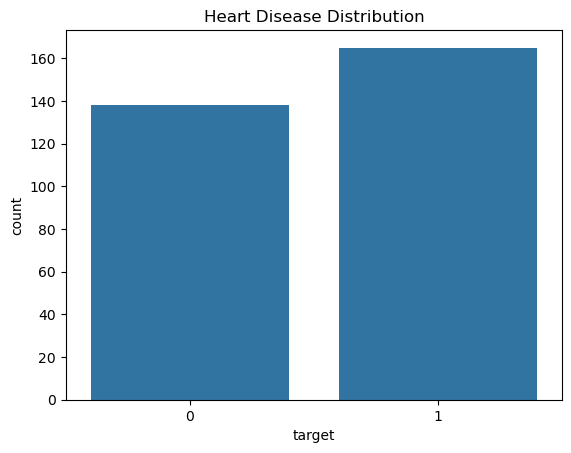

In [664]:
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()


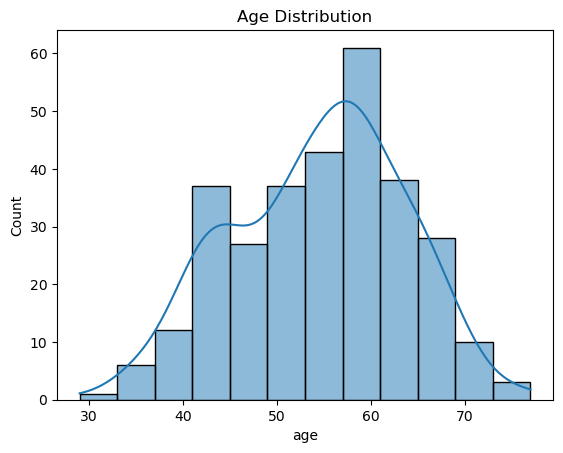

In [665]:
sns.histplot(data=df, x='age',kde=True)
plt.title('Age Distribution')
plt.show()


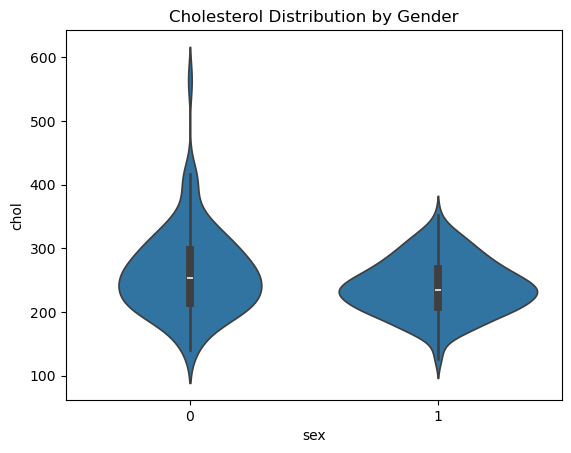

In [666]:
sns.violinplot(x='sex', y='chol', data=df)
plt.title('Cholesterol Distribution by Gender')
plt.show()


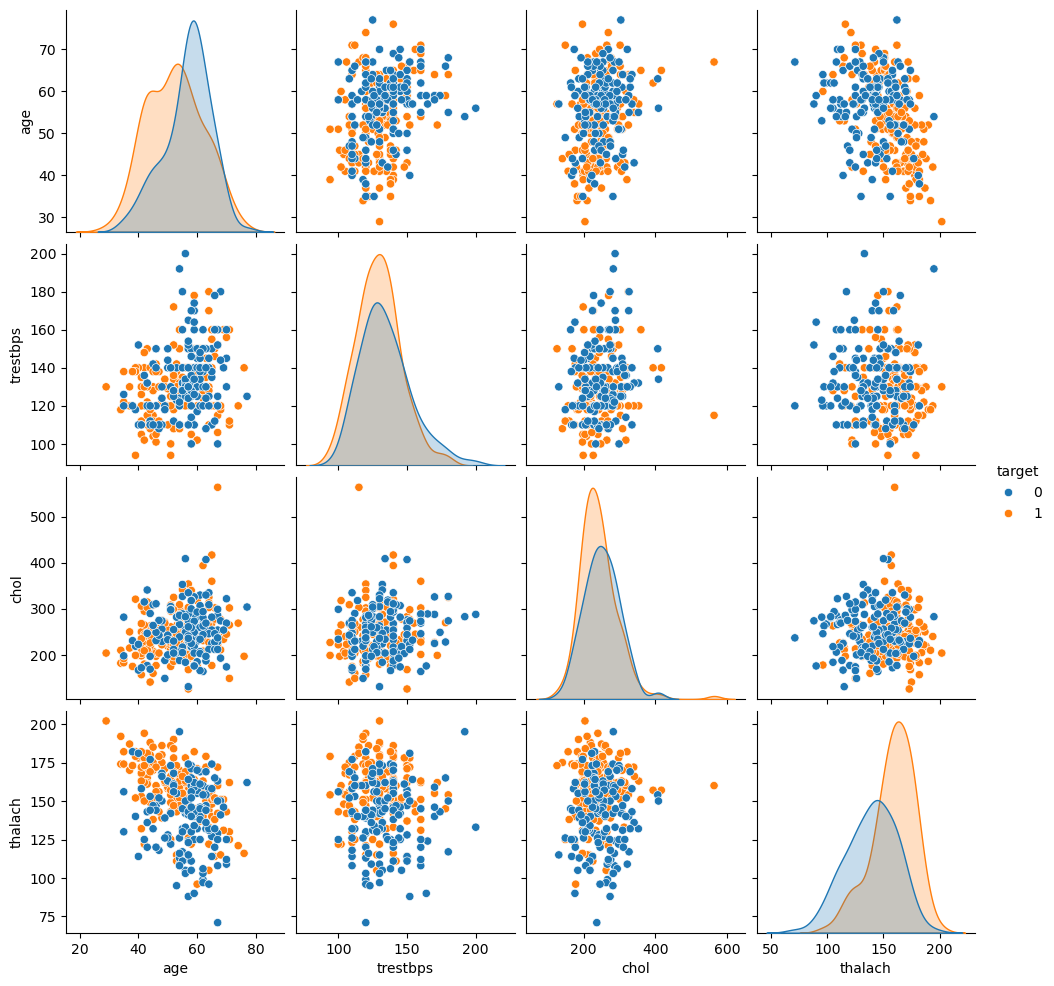

In [667]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']],hue='target' )
plt.show()


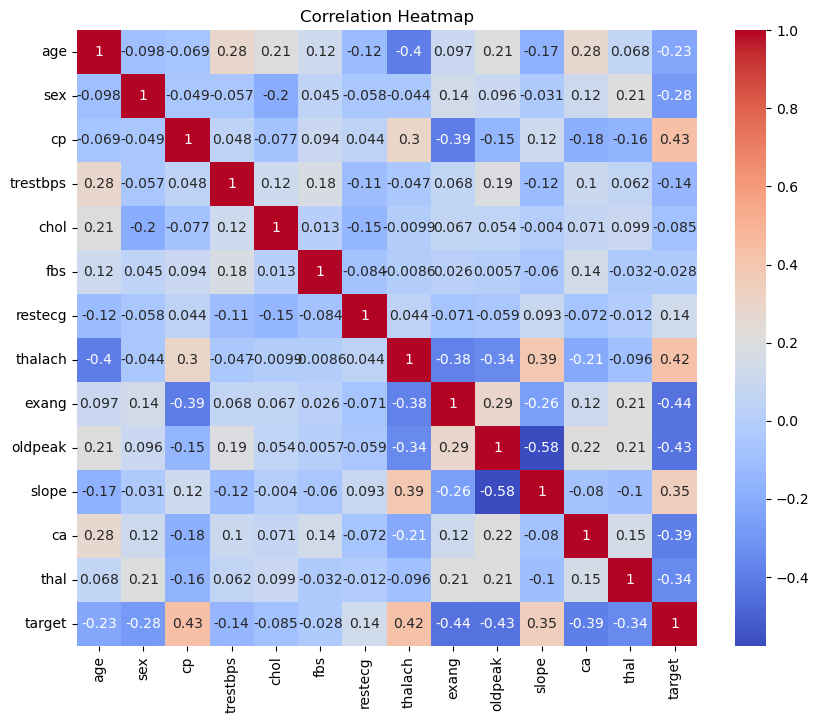

In [668]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Data Preprocessing

- Divide the data into Features and Target
- Perform Feature Scaling
- Divide the data into Training and Test Sets

In [670]:
X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Logistic Regression Model

- Initialize a Logistic Regression Model
- Train the model
- Find the Training Accuracy, Precision, Recall, F1 Score
- Find the Test Accuracy, Precision, Recall, F1 Score
- Visualize Train and Test Confusion Metrics



In [672]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [673]:
y_train_pred = model.predict(X_train)


y_test_pred = model.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
class_rept = classification_report(y_train, y_train_pred)
conf_mtx = confusion_matrix(y_train, y_train_pred)
r_curve = roc_curve(y_train, y_train_pred)


test_accuracy = accuracy_score(y_test, y_test_pred)
class_rept = classification_report(y_test, y_test_pred)
conf_mtx = confusion_matrix(y_test, y_test_pred)
r_curve = roc_curve(y_test, y_test_pred)



In [679]:
print("Training Metrics:")
print(f"Accuracy:  {train_accuracy:.4f}")
print(f"classification_report: {class_rept}")
print(f"confusion_matrix:    {conf_mtx}")
print(f"roc_curve:  {r_curve}")

print("\nTest Metrics:")
print(f"Accuracy:  {train_accuracy:.4f}")
print(f"classification_report: {class_rept}")
print(f"confusion_matrix:    {conf_mtx}")
print(f"roc_curve:  {r_curve}")

Training Metrics:
Accuracy:  0.8636
classification_report:               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

confusion_matrix:    [[25  4]
 [ 5 27]]
roc_curve:  (array([0.        , 0.13793103, 1.        ]), array([0.     , 0.84375, 1.     ]), array([inf,  1.,  0.]))

Test Metrics:
Accuracy:  0.8636
classification_report:               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

confusion_matrix:    [[25  4]
 [ 5 27]]
roc_curve:  (array([0.        , 0

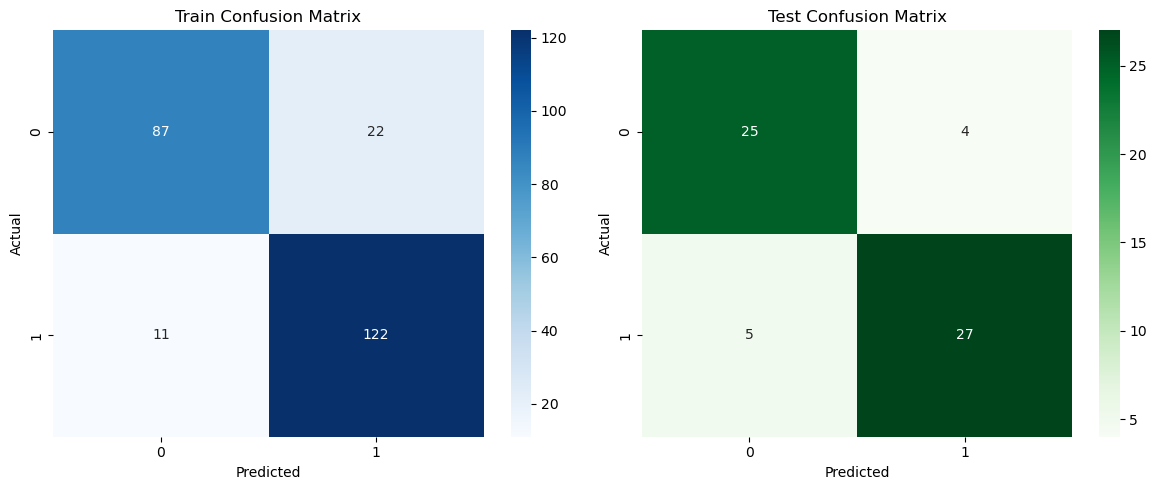

In [686]:
# Confusion Metrics
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Train Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(test_cm, annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("Test Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


# Neural Network Model

- Design a Neural Network Model
- Train the model
- Find the Training Accuracy, Precision, Recall, F1 Score
- Find the Test Accuracy, Precision, Recall, F1 Score
- Plot the train and test accuracy after each epoch 
- Visualize Train and Test Confusion Metrics



In [689]:
model = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\manas\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [690]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=0)


In [692]:
y_train_pred_prob = model.predict(X_train).flatten()
y_test_pred_prob = model.predict(X_test).flatten()

y_train_pred = (y_train_pred_prob >= 0.5).astype(int)
y_test_pred = (y_test_pred_prob >= 0.5).astype(int)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [693]:
train_accuracy = accuracy_score(y_train, y_train_pred)
class_rept = classification_report(y_train, y_train_pred)
conf_mtx = confusion_matrix(y_train, y_train_pred)
r_curve = roc_curve(y_train, y_train_pred)

# Test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
class_rept = classification_report(y_test, y_test_pred)
conf_mtx = confusion_matrix(y_test, y_test_pred)
r_curve = roc_curve(y_test, y_test_pred)

In [694]:
print("Training Metrics:")
print(f"Accuracy:  {train_accuracy:.4f}")
print(f"classification_report: {class_rept}")
print(f"confusion_matrix:    {conf_mtx}")
print(f"roc_curve:  {r_curve}")

print("\nTest Metrics:")
print(f"Accuracy:  {train_accuracy:.4f}")
print(f"classification_report: {class_rept}")
print(f"confusion_matrix:    {conf_mtx}")
print(f"roc_curve:  {r_curve}")

Training Metrics:
Accuracy:  0.8967
classification_report:               precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

confusion_matrix:    [[24  5]
 [ 6 26]]
roc_curve:  (array([0.        , 0.17241379, 1.        ]), array([0.    , 0.8125, 1.    ]), array([inf,  1.,  0.]))

Test Metrics:
Accuracy:  0.8967
classification_report:               precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

confusion_matrix:    [[24  5]
 [ 6 26]]
roc_curve:  (array([0.        , 0.17

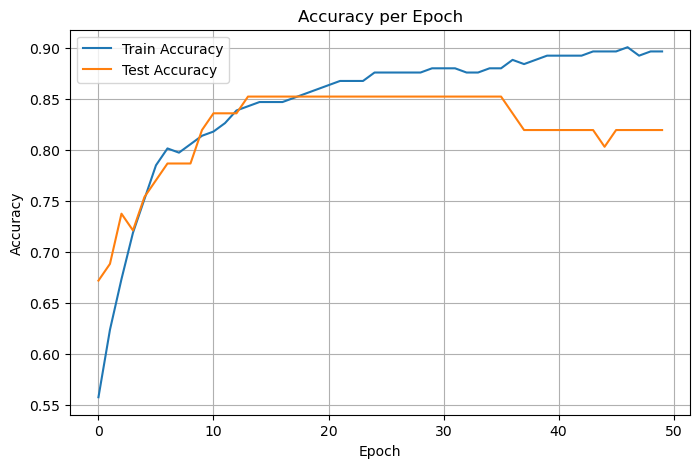

In [695]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


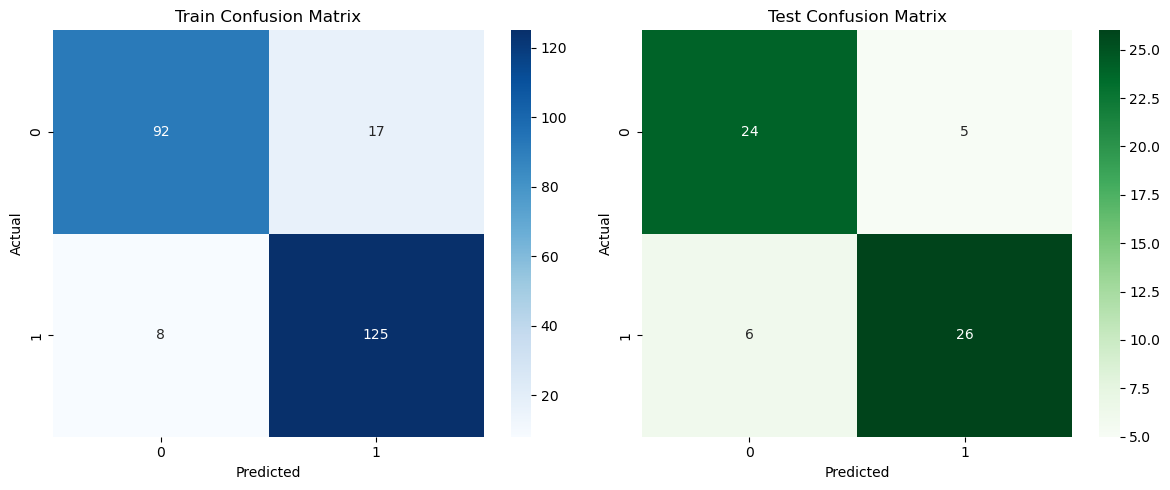

In [696]:
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Train Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(test_cm, annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("Test Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


# Random Froest Model

- Design a Random Forest Model
- Train the model
- Find the Training Accuracy, Precision, Recall, F1 Score
- Find the Test Accuracy, Precision, Recall, F1 Score
- Visualize Train and Test Confusion Metrics


 


In [698]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [699]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)


In [700]:
train_accuracy = accuracy_score(y_train, y_train_pred)
class_rept = classification_report(y_train, y_train_pred)
conf_mtx = confusion_matrix(y_train, y_train_pred)
r_curve = roc_curve(y_train, y_train_pred)


test_accuracy = accuracy_score(y_test, y_test_pred)
class_rept = classification_report(y_test, y_test_pred)
conf_mtx = confusion_matrix(y_test, y_test_pred)
r_curve = roc_curve(y_test, y_test_pred)

In [701]:
print("Training Metrics:")
print(f"Accuracy:  {train_accuracy:.4f}")
print(f"classification_report: {class_rept}")
print(f"confusion_matrix:    {conf_mtx}")
print(f"roc_curve:  {r_curve}")

print("\nTest Metrics:")
print(f"Accuracy:  {train_accuracy:.4f}")
print(f"classification_report: {class_rept}")
print(f"confusion_matrix:    {conf_mtx}")
print(f"roc_curve:  {r_curve}")

Training Metrics:
Accuracy:  1.0000
classification_report:               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

confusion_matrix:    [[24  5]
 [ 5 27]]
roc_curve:  (array([0.        , 0.17241379, 1.        ]), array([0.     , 0.84375, 1.     ]), array([inf,  1.,  0.]))

Test Metrics:
Accuracy:  1.0000
classification_report:               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

confusion_matrix:    [[24  5]
 [ 5 27]]
roc_curve:  (array([0.        , 0

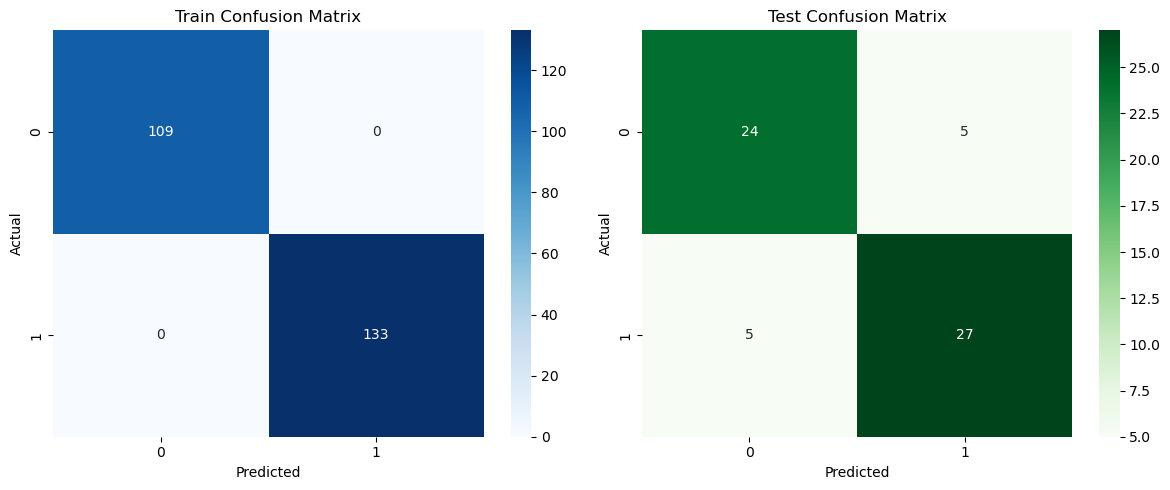

In [702]:
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm, annot=True, fmt="d", cmap="Blues", ax=ax[0])
ax[0].set_title("Train Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(test_cm, annot=True, fmt="d", cmap="Greens", ax=ax[1])
ax[1].set_title("Test Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


# Model Comparison

- Compare the performance on Test set for each model on Accuracy, Precision and Recall
- Use Visualization Techniques
- Draw ROC Curves for each of the three model
- What we learn from ROC Curves?
- Add more cells as required.

In [703]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_log_pred = log_model.predict(X_test)
y_log_prob = log_model.predict_proba(X_test)[:, 1]


y_nn_prob = model.predict(X_test).flatten()
y_nn_pred = (y_nn_prob >= 0.5).astype(int)


y_rf_pred = rf.predict(X_test)
y_rf_prob = rf.predict_proba(X_test)[:, 1]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [704]:
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "class_rept": classification_report(y_true, y_pred),

    }

metrics_log = get_metrics(y_test, y_log_pred)
metrics_nn = get_metrics(y_test, y_nn_pred)
metrics_rf = get_metrics(y_test, y_rf_pred)


compare_df = pd.DataFrame({
    "Logistic Regression": metrics_log,
    "Neural Network": metrics_nn,
    "Random Forest": metrics_rf
}).T

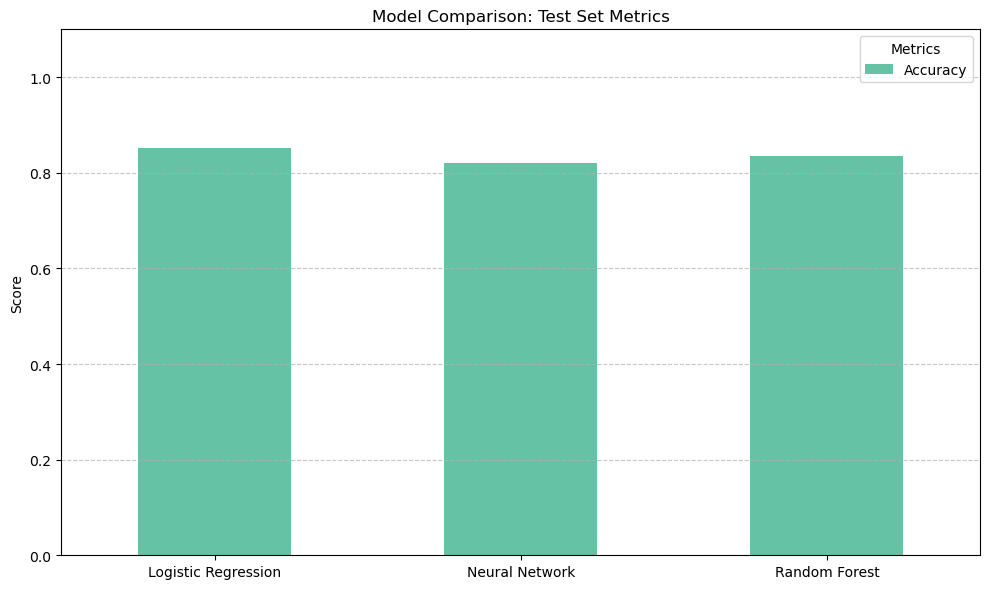

In [705]:
compare_df.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Model Comparison: Test Set Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Metrics")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


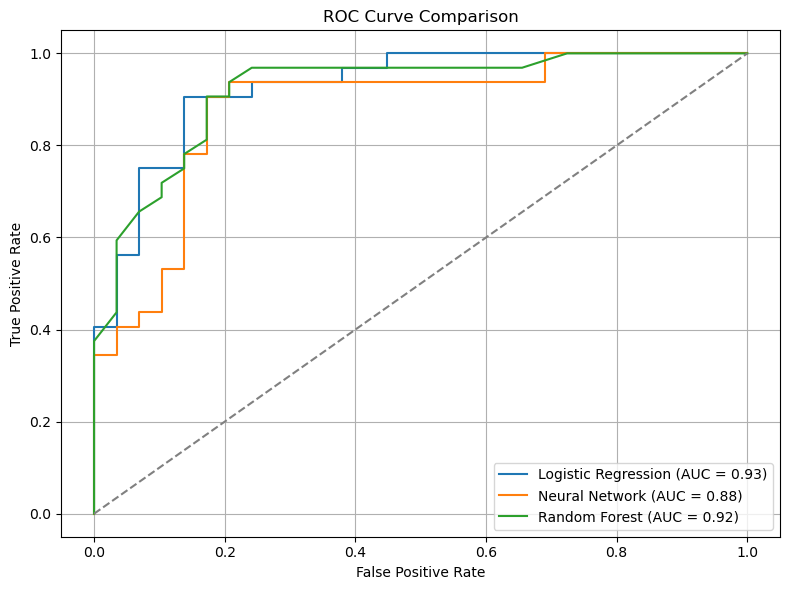

In [706]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_log_prob)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_nn_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf_prob)

auc_log = auc(fpr_log, tpr_log)
auc_nn = auc(fpr_nn, tpr_nn)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {auc_nn:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
